In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import os
import math
import copy

pd.set_option('display.max_rows', None)

In [11]:
dir_path = '../logs/'

In [34]:
times_dict = {
    'bucket_split_time': None,
    'bucket_sort_time': None,
    'bucket_to_array_time': None,
    'table_fill_time': None,
    'program_time': None
}

In [35]:
run_dict = {
    'algorithm': None,
    'points': None,
    'buckets': None,
    'threads': None,
    'times': []
}

In [47]:
all_run_dict = []

In [45]:
df = pd.DataFrame()

for filename in os.listdir(dir_path):
    if filename.endswith('.log'):
        # Create new entry structures
        tmp_run_dict = copy.deepcopy(run_dict)
        tmp_times_dict = copy.deepcopy(times_dict)
        
        # Fill run_dict structure
        run_specification = filename.split('_')
        tmp_run_dict['algorithm'] = int(run_specification[1])
        tmp_run_dict['points'] = int(run_specification[3])
        tmp_run_dict['buckets'] = int(run_specification[5])
        tmp_run_dict['threads'] = int(run_specification[7][0])
        
        print('../'+filename)
        
        # Fill times_dict structure
        with open(dir_path+filename, 'r') as file_object:
            for line in file_object:
                if line.startswith('-'):
                    continue
                elif line.startswith('program_time'):
                    line_words = line.split(' ')
                    tmp_times_dict[line_words[0]] = line_words[1]
                    tmp_run_dict['times'].append(copy.deepcopy(tmp_times_dict))
                else:
                    line_words = line.split(' ')
                    tmp_times_dict[line_words[0]] = line_words[1]

        all_run_dict.append(copy.deepcopy(tmp_run_dict))

../algorithm_2_points_4000000_buckets_4000_threads_1.log
../algorithm_1_points_4000000_buckets_400000_threads_4.log
../algorithm_2_points_20000000_buckets_200000_threads_2.log
../algorithm_2_points_16000000_buckets_1600000_threads_2.log
../algorithm_2_points_8000000_buckets_800_threads_3.log
../algorithm_1_points_1000000_buckets_1000_threads_4.log
../algorithm_1_points_1000000_buckets_100000_threads_2.log
../algorithm_2_points_16000000_buckets_160000_threads_2.log
../algorithm_1_points_16000000_buckets_1600000_threads_2.log
../algorithm_1_points_16000000_buckets_160000_threads_1.log
../algorithm_1_points_20000000_buckets_2000000_threads_4.log
../algorithm_1_points_8000000_buckets_80000_threads_4.log
../algorithm_1_points_12000000_buckets_12000_threads_4.log
../algorithm_2_points_16000000_buckets_1600000_threads_3.log
../algorithm_1_points_8000000_buckets_80000_threads_1.log
../algorithm_1_points_20000000_buckets_20000_threads_4.log
../algorithm_2_points_8000000_buckets_800000_threads_3

In [46]:
all_run_dict[:3]

[{'algorithm': 2,
  'points': 4000000,
  'buckets': 4000,
  'threads': 1,
  'times': [{'bucket_split_time': '0.290938',
    'bucket_sort_time': '0.964506',
    'bucket_to_array_time': '0.077626',
    'table_fill_time': '0.9145',
    'program_time': '2.26512'},
   {'bucket_split_time': '0.270698',
    'bucket_sort_time': '0.965475',
    'bucket_to_array_time': '0.078212',
    'table_fill_time': '0.738281',
    'program_time': '2.06971'},
   {'bucket_split_time': '0.282633',
    'bucket_sort_time': '0.965773',
    'bucket_to_array_time': '0.079645',
    'table_fill_time': '0.737586',
    'program_time': '2.08202'},
   {'bucket_split_time': '0.288938',
    'bucket_sort_time': '0.963611',
    'bucket_to_array_time': '0.122694',
    'table_fill_time': '0.742299',
    'program_time': '2.14572'},
   {'bucket_split_time': '0.339577',
    'bucket_sort_time': '0.962577',
    'bucket_to_array_time': '0.077254',
    'table_fill_time': '0.972534',
    'program_time': '2.37226'},
   {'bucket_split_t

In [ ]:
# up to this point ;)

In [19]:
def time_agg(df):
    return df.groupby(['type', 'size']).agg({'time':['mean', 'std']}).reset_index()

In [14]:
time_agg(df)

type       size       time          
                                        mean       std
0                 auto    1000000   0.069775  0.004772
1                 auto    2000000   0.142500  0.007854
2                 auto    4000000   0.284633  0.018096
3                 auto    8000000   0.578333  0.025945
4                 auto   16000000   1.168707  0.061426
5                 auto   32000000   2.261234  0.117990
6                 auto   64000000   4.562929  0.273818
7                 auto  128000000   9.701188  1.751511
8      dynamic chunk 1    1000000   0.100246  0.008640
9      dynamic chunk 1    2000000   0.213105  0.035121
10     dynamic chunk 1    4000000   0.385060  0.027594
11     dynamic chunk 1    8000000   0.806599  0.079470
12     dynamic chunk 1   16000000   1.571599  0.106826
13     dynamic chunk 1   32000000   3.019676  0.270456
14     dynamic chunk 1   64000000   6.386641  1.569850
15     dynamic chunk 1  128000000  13.055659  2.681453
16  dynamic chunk auto    1000000   0.120640  0.028825
17  dynamic chunk auto    2000000   0.226455  0.043602
18  dynamic chunk auto    4000000   0.432969  0.062961
19  dynamic chunk auto    8000000   0.819667  0.147295
20  dynamic chunk auto   16000000   1.476681  0.189091
21  dynamic chunk auto   32000000   3.343989  0.824684
22  dynamic chunk auto   64000000   7.591884  3.037157
23  dynamic chunk auto  128000000  11.997313  0.689178
24      static chunk 1    1000000   0.092959  0.016703
25      static chunk 1    2000000   0.180478  0.027613
26      static chunk 1    4000000   0.361896  0.054163
27      static chunk 1    8000000   0.697373  0.094164
28      static chunk 1   16000000   1.323238  0.141854
29      static chunk 1   32000000   2.860114  0.460487
30      static chunk 1   64000000   5.773969  1.242878
31      static chunk 1  128000000  11.410540  3.552901
32   static chunk auto    1000000   0.115839  0.052018
33   static chunk auto    2000000   0.231785  0.104314
34   static chunk auto    4000000   0.456292  0.211020
35   static chunk auto    8000000   0.856586  0.462966
36   static chunk auto   16000000   1.807463  0.872676
37   static chunk auto   32000000   3.939156  1.862992
38   static chunk auto   64000000   7.593970  3.440389
39   static chunk auto  128000000  15.539552  6.624220

In [150]:
def speedup_agg(df):
    for schedule_type in df['type'].unique():
        for problem_size in df['size'].unique():
            first = time_agg(df.loc[(df['size']==problem_size) & (df['type']=='without OpenMP')])[('time', 'mean')].iloc[0]
            #print(df.loc[(df['size']==problem_size) & (df['type']==schedule_type)])
            df.loc[(df['size']==problem_size) & (df['type']==schedule_type), 'basic time'] = first
    df['speedup'] = df['basic time']/df['time']
    df = df.drop(['basic time'], axis=1)
    return df.groupby(['type', 'size']).agg({'speedup':['mean', 'std']}).reset_index()

In [151]:
speedup_df = speedup_agg(df)
speedup_df

type       size   speedup          
                                       mean       std
0                 auto    1000000  2.694295  0.179663
1                 auto    2000000  2.634133  0.147050
2                 auto    4000000  2.638528  0.166915
3                 auto    8000000  2.593785  0.118599
4                 auto   16000000  2.587070  0.137479
5                 auto   32000000  2.849850  0.148477
6                 auto   64000000  2.684524  0.162148
7                 auto  128000000  2.541359  0.336315
8      dynamic chunk 1    1000000  1.879813  0.154188
9      dynamic chunk 1    2000000  1.796966  0.263770
10     dynamic chunk 1    4000000  1.951835  0.131157
11     dynamic chunk 1    8000000  1.873770  0.189137
12     dynamic chunk 1   16000000  1.927375  0.133690
13     dynamic chunk 1   32000000  2.142566  0.166246
14     dynamic chunk 1   64000000  2.007703  0.421115
15     dynamic chunk 1  128000000  1.899281  0.280571
16  dynamic chunk auto    1000000  1.637789  0.381308
17  dynamic chunk auto    2000000  1.710049  0.315350
18  dynamic chunk auto    4000000  1.762496  0.251152
19  dynamic chunk auto    8000000  1.883681  0.336832
20  dynamic chunk auto   16000000  2.072776  0.254146
21  dynamic chunk auto   32000000  2.024825  0.442510
22  dynamic chunk auto   64000000  1.799307  0.528112
23  dynamic chunk auto  128000000  2.015636  0.116386
24      static chunk 1    1000000  2.077626  0.376706
25      static chunk 1    2000000  2.121158  0.326861
26      static chunk 1    4000000  2.112792  0.321097
27      static chunk 1    8000000  2.183216  0.285459
28      static chunk 1   16000000  2.303286  0.239948
29      static chunk 1   32000000  2.305819  0.386977
30      static chunk 1   64000000  2.196486  0.406146
31      static chunk 1  128000000  2.243988  0.465677
32   static chunk auto    1000000  2.374307  0.315972
33   static chunk auto    2000000  2.381401  0.353438
34   static chunk auto    4000000  2.427936  0.212740
35   static chunk auto    8000000  2.817743  0.262591
36   static chunk auto   16000000  2.522237  0.210101
37   static chunk auto   32000000  2.444406  0.388163
38   static chunk auto   64000000  2.390878  0.426357
39   static chunk auto  128000000  2.250428  0.446650
40      without OpenMP    1000000  1.000001  0.000811
41      without OpenMP    2000000  1.000001  0.000835
42      without OpenMP    4000000  1.000001  0.000853
43      without OpenMP    8000000  1.000004  0.002117
44      without OpenMP   16000000  1.000067  0.008629
45      without OpenMP   32000000  1.009232  0.097217
46      without OpenMP   64000000  1.000939  0.031387
47      without OpenMP  128000000  1.001231  0.035745

In [180]:
def plot_time(df):
    df = time_agg(df)
    plt.figure(figsize=(12, 12))
    
    sizes = [int(size) for size in df['size'].unique()]
    cmap = plt.cm.get_cmap('hsv', len(sizes))
    for index, schedule_type in enumerate(df['type'].unique()):
        df_schedule_type = df[df['type'] == schedule_type]
        x = df['size'].unique()
        plt.plot(x, df_schedule_type[('time', 'mean')], '--o', c=cmap(index))
        # plt.errorbar(df['size'].unique(), df_schedule_type[('time', 'mean')], df_schedule_type[('time', 'std')], 
                     # linestyle='None', marker='o', c=cmap(index), label=schedule_type)
    # plt.xticks(sizes)
    # style: plain/sci
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.title('Time for different scheduling types', fontsize=15)
    plt.xlabel('Problem (vector) size', fontsize=15)
    plt.ylabel('Time [s]', fontsize=15)
    plt.legend(loc='lower right', labels=df['type'].unique(), prop={'size': 15})
    plt.savefig('all_schedules_time.png')

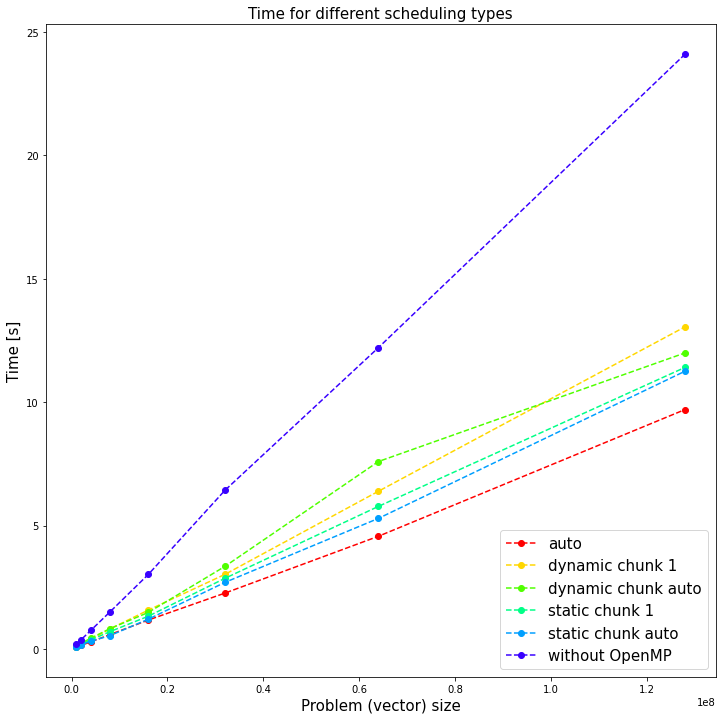

In [181]:
plot_time(df)

In [153]:
def plot_single_time(df, schedule_type):
    df = time_agg(df)
    plt.figure(figsize=(8, 8))
    sizes = [int(size) for size in df['size'].unique()]
    df_schedule_type = df[df['type'] == schedule_type]
    x = df['size'].unique()
    plt.plot(x, df_schedule_type[('time', 'mean')], '--o', c="red")
    plt.errorbar(df['size'].unique(), df_schedule_type[('time', 'mean')], df_schedule_type[('time', 'std')], 
                    linestyle='None', marker='o', c="red", label=schedule_type)
    # plt.xticks(sizes)
    # style: plain/sci
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    if schedule_type == 'without OpenMP':
        plt.title('Time {}'.format(schedule_type), fontsize=15)
    else:
        plt.title('Time in {} scheduling'.format(schedule_type), fontsize=15)
    plt.xlabel('Problem (vector) size', fontsize=12)
    plt.ylabel('Time [s]', fontsize=12)
    plt.legend(loc='lower right', prop={'size': 12})
    plt.savefig(str(schedule_type) + '_time' + '.png')

In [42]:
def plot_time_schedulers(df):
    for index, schedule_type in enumerate(df['type'].unique()):
        plot_single_time(df, schedule_type)

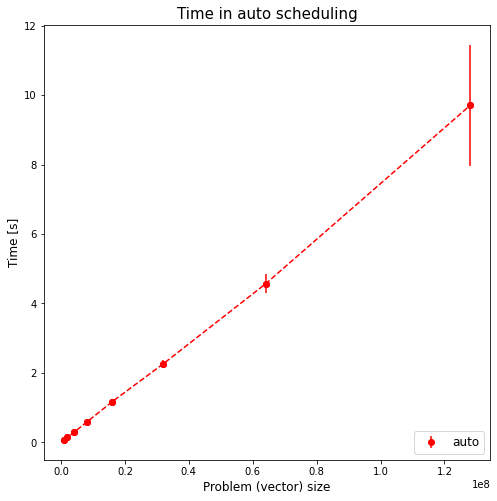

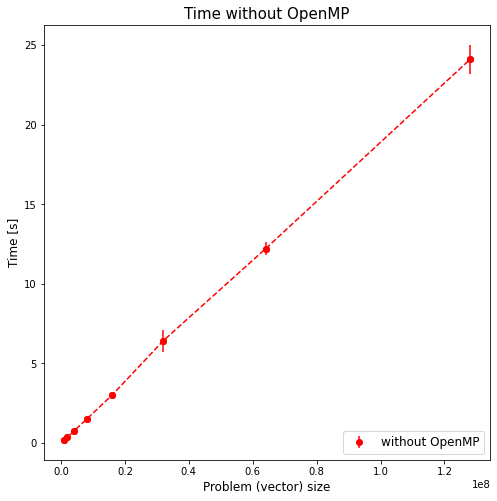

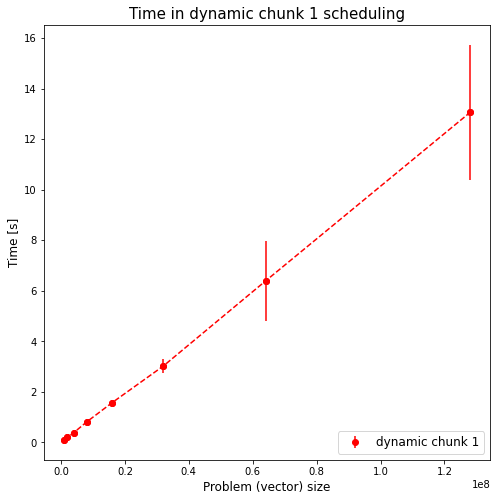

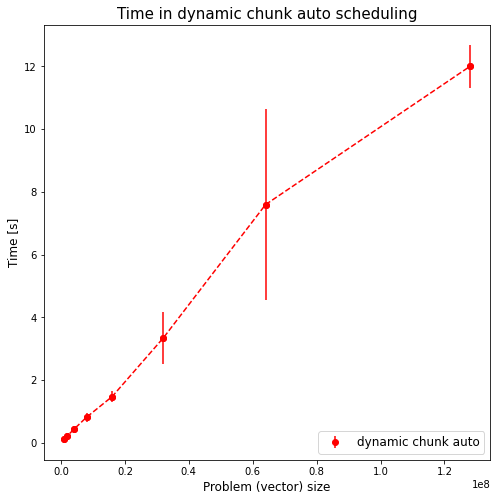

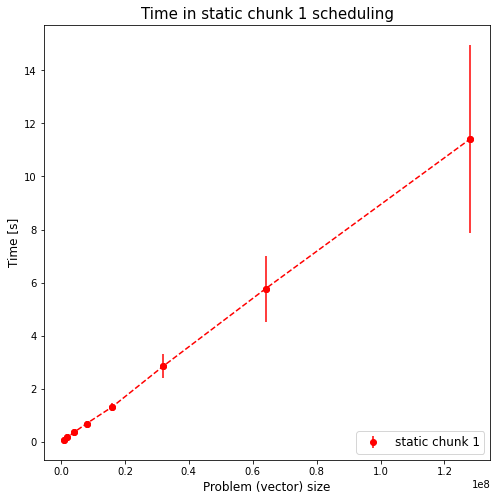

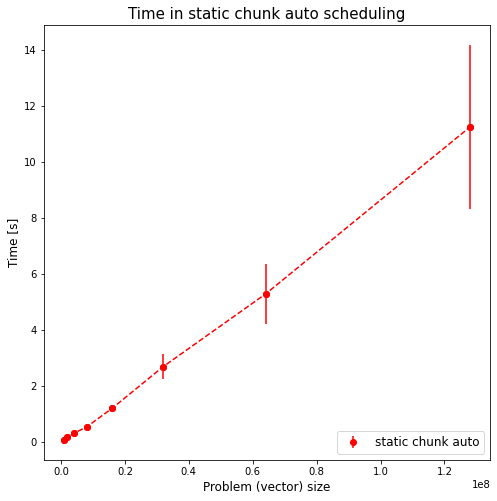

In [43]:
plot_time_schedulers(df)

In [171]:
def plot_single_speedup(df, schedule_type):
    df = speedup_agg(df)
    plt.figure(figsize=(8, 8))
    sizes = [int(size) for size in df['size'].unique()]
    df_schedule_type = df[df['type'] == schedule_type]
    x = df['size'].unique()
    plt.plot(x, df_schedule_type[('speedup', 'mean')], '--o', c="red")
    plt.errorbar(df['size'].unique(), df_schedule_type[('speedup', 'mean')], df_schedule_type[('speedup', 'std')], 
                    linestyle='None', marker='o', c="red", label=schedule_type)
    # plt.xticks(sizes)
    # style: plain/sci
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.title('Speedup in {} scheduling'.format(schedule_type), fontsize=15)
    plt.xlabel('Problem (vector) size', fontsize=12)
    plt.ylabel('Speedup', fontsize=12)
    plt.legend(loc='lower right', prop={'size': 12})
    plt.savefig(str(schedule_type) + '_speedup' + '.png')

In [172]:
def plot_speedup_schedulers(df):
    for index, schedule_type in enumerate(df['type'].unique()):
        if schedule_type != 'without OpenMP':
            plot_single_speedup(df, schedule_type)

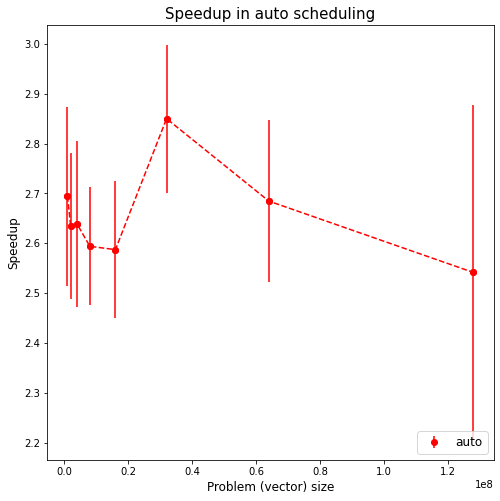

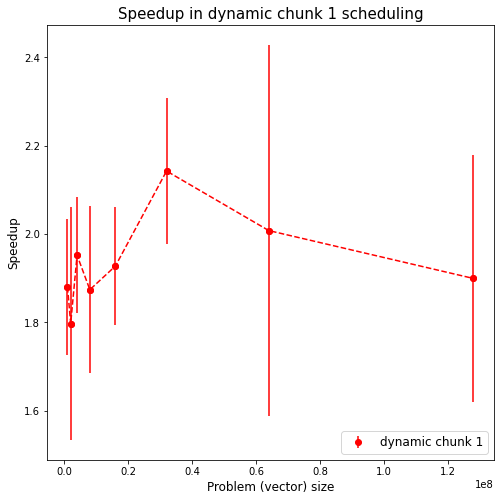

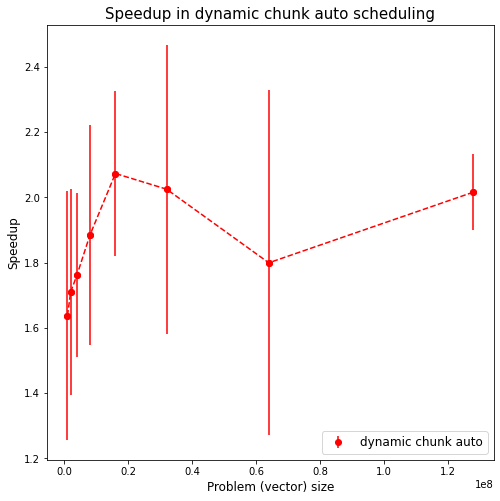

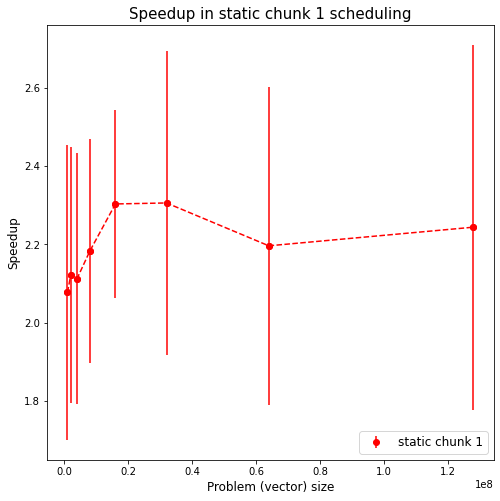

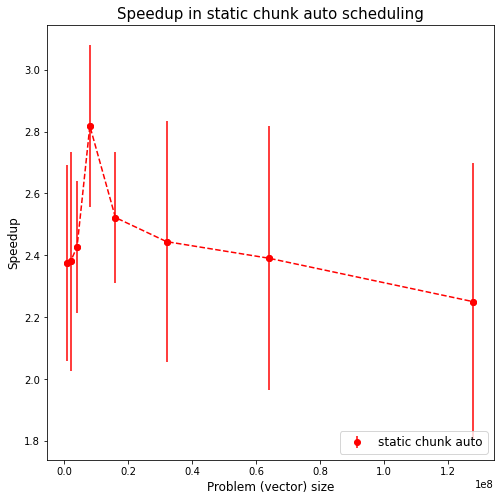

In [173]:
plot_speedup_schedulers(df)

In [176]:
def plot_speedup(df):
    df = speedup_agg(df)
    plt.figure(figsize=(12, 12))
    
    sizes = [int(size) for size in df['size'].unique()]
    cmap = plt.cm.get_cmap('hsv', len(sizes))
    for index, schedule_type in enumerate(df['type'].unique()):
        if schedule_type != 'without OpenMP':
            df_schedule_type = df[df['type'] == schedule_type]
            x = df['size'].unique()
            plt.plot(x, df_schedule_type[('speedup', 'mean')], '--o', c=cmap(index))
        # plt.errorbar(df['size'].unique(), df_schedule_type[('speedup', 'mean')], df_schedule_type[('speedup', 'std')], 
                     # linestyle='None', marker='o', c=cmap(index), label=schedule_type)
    # plt.xticks(sizes)
    # style: plain/sci
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.title('Speedup for different scheduling types', fontsize=15)
    plt.xlabel('Problem (vector) size', fontsize=15)
    plt.ylabel('Speedup', fontsize=15)
    plt.legend(loc='lower right', labels=df['type'].unique(), prop={'size': 15})
    plt.savefig('all_schedules_speedup.png')

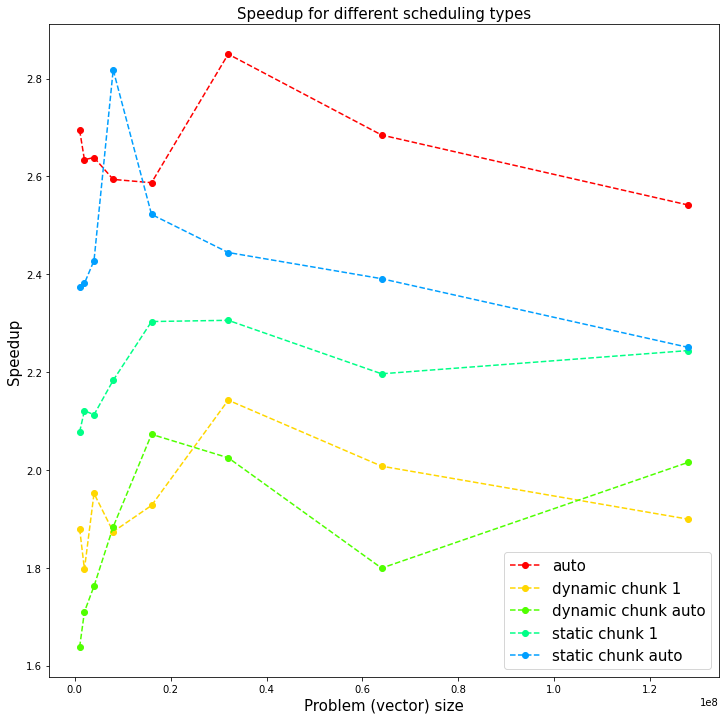

In [177]:
plot_speedup(df)